In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Housing_Pricing.csv')

In [3]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Exploratory Data Analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
missing = dataset.isnull().sum()
missing_percent = 100 * missing / len(dataset)

missing_table = pd.DataFrame({
    'Missing Values': missing,
    '% of Total': missing_percent
})
missing_table = missing_table[missing_table['Missing Values'] > 0].sort_values('% of Total', ascending=False)
print(missing_table.head(20))

              Missing Values  % of Total
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493


In [6]:
df = dataset.copy()

In [7]:
df = df.drop(columns = ['PoolQC','MiscFeature','Alley','Fence'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
df.isnull().sum().sort_values(ascending=False).head(20)

,0
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageFinish,81
GarageQual,81
GarageCond,81
GarageType,81
GarageYrBlt,81
BsmtExposure,38
BsmtFinType2,38


In [10]:
# Copy dataset for EDA
df_eda = df.copy()

# Light imputation

# 1) Numeric columns → fill NaN with 0 (safe temporary choice)
num_cols = df_eda.select_dtypes(include=['int64','float64']).columns
df_eda[num_cols] = df_eda[num_cols].fillna(0)

# 2) Categorical columns → fill NaN with "None"
cat_cols = df_eda.select_dtypes(include=['object']).columns
df_eda[cat_cols] = df_eda[cat_cols].fillna("None")


Feature Selection

In [11]:
corr = df_eda.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(corr.head(15))   # top 15 correlated features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
Name: SalePrice, dtype: float64


In [12]:
print(corr.tail(10))   # least correlated features

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Visualization

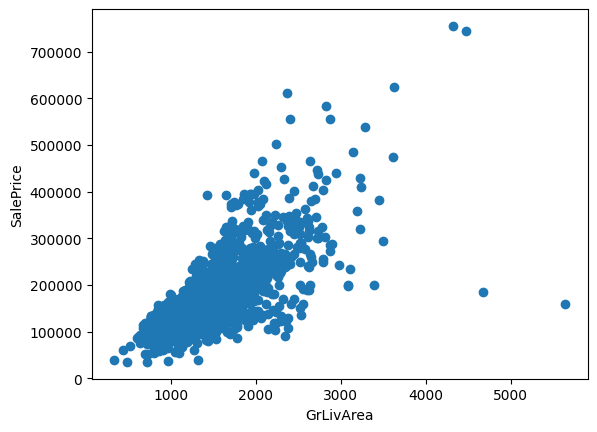

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df_eda['GrLivArea'], df_eda['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


In [14]:
df_eda = df_eda.drop(df_eda[(df_eda['GrLivArea'] > 4000) & (df_eda['SalePrice'] < 300000)].index)


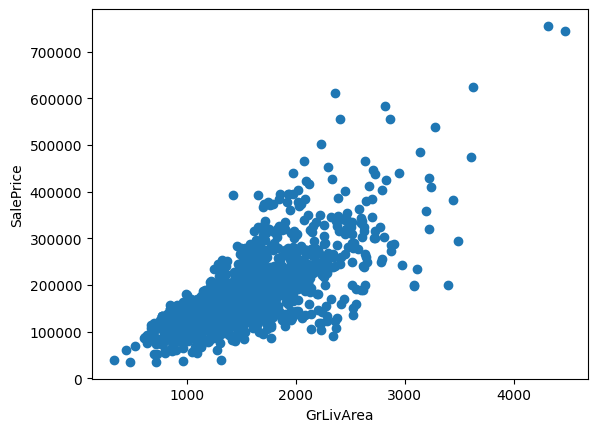

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df_eda['GrLivArea'], df_eda['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


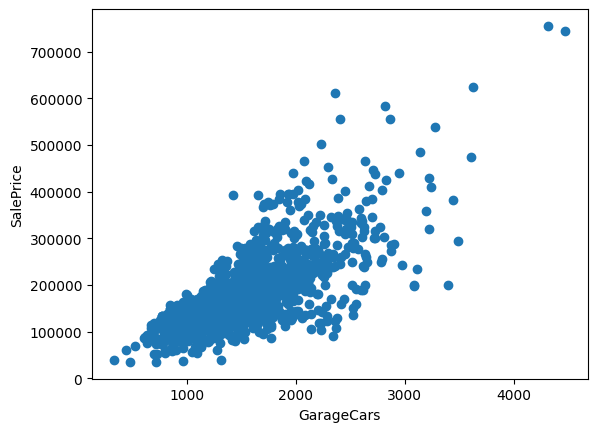

In [16]:
plt.scatter(df_eda['GrLivArea'], df_eda['SalePrice'])
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

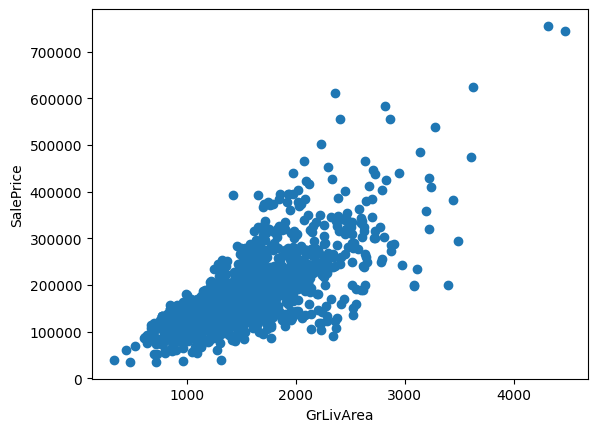

In [17]:
plt.scatter(df_eda['GrLivArea'], df_eda['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

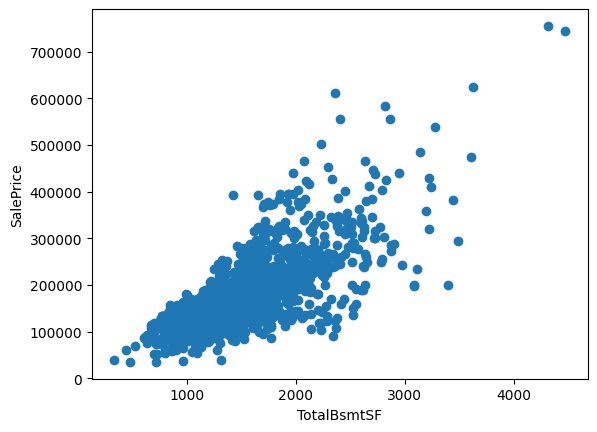

In [18]:
plt.scatter(df_eda['GrLivArea'], df_eda['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

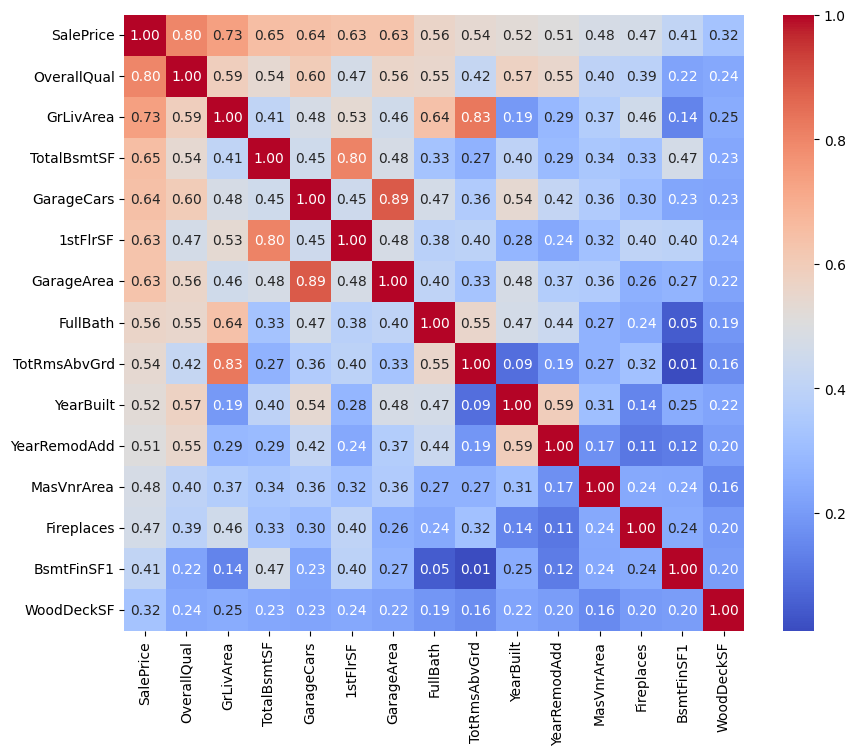

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get correlations of all numeric columns
corr_matrix = df_eda.corr(numeric_only=True)

# Step 2: Pick the top 15 features correlated with SalePrice
top_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(15).index

# Step 3: Create a smaller matrix with just those features
top_corr = corr_matrix.loc[top_features, top_features]

# Step 4: Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(top_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


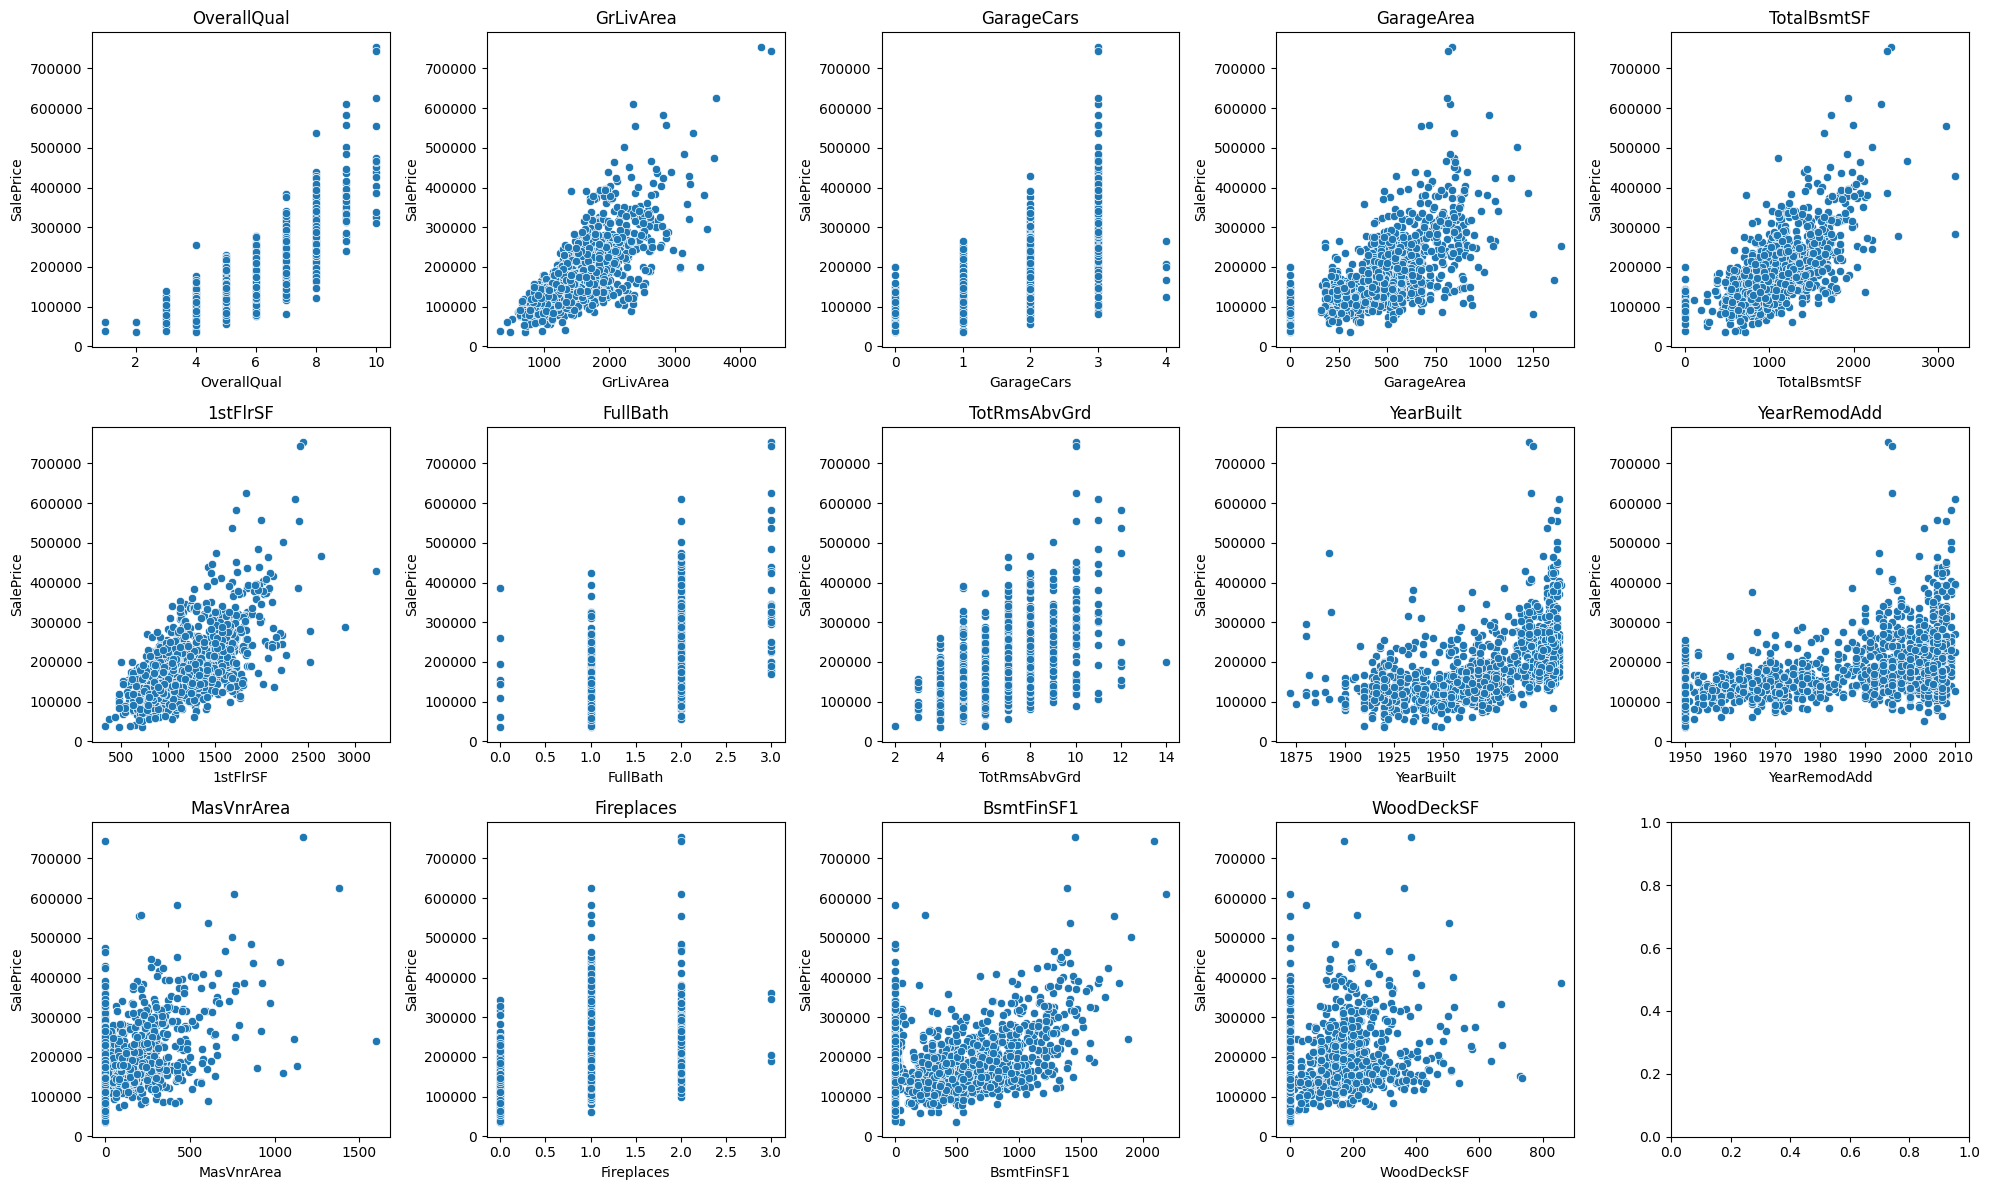

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# pick your top correlated numeric features (excluding SalePrice itself)
top_features = ['OverallQual','GrLivArea','GarageCars','GarageArea',
                'TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd',
                'YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces',
                'BsmtFinSF1','WoodDeckSF']

# set up grid (3 rows x 5 cols = 15 plots)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,12))

for i, col in enumerate(top_features):
    ax = axes[i//5, i%5]  # row, col position
    sns.scatterplot(x=df_eda[col], y=df_eda['SalePrice'], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()


In [21]:
import numpy as np
df_eda['SalePrice'] = np.log1p(df_eda['SalePrice'])   # target
df_eda['GrLivArea'] = np.log1p(df_eda['GrLivArea'])   # example feature


In [22]:
df_encoded = pd.get_dummies(df_eda, drop_first=True)

Model Building

In [23]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.8964084876111121
RMSE: 0.1321479100469316


Original Sales Price vs Selected Sales Price

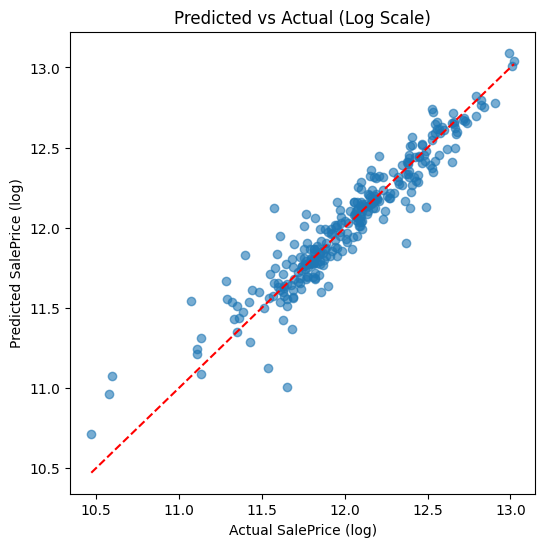

In [25]:
import matplotlib.pyplot as plt

# If you want to compare in log space (what model used)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual SalePrice (log)")
plt.ylabel("Predicted SalePrice (log)")
plt.title("Predicted vs Actual (Log Scale)")
plt.show()


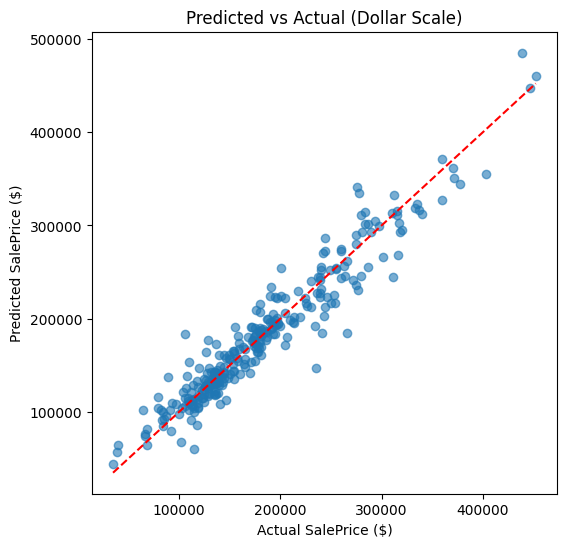

In [26]:
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred)

plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.6)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel("Actual SalePrice ($)")
plt.ylabel("Predicted SalePrice ($)")
plt.title("Predicted vs Actual (Dollar Scale)")
plt.show()


Improving the model using Ridge Lasso


In [29]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge R²:", r2_score(y_test, ridge_pred))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))

# Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso R²:", r2_score(y_test, lasso_pred))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred)))


Ridge R²: 0.9108376742881683
Ridge RMSE: 0.12259955851758778
Lasso R²: 0.9083797273909427
Lasso RMSE: 0.1242779274589599


Cross Validation

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


cv = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=10.0),
    "Lasso": Lasso(alpha=0.001, max_iter=10000),
    "RandomForest": RandomForestRegressor(n_estimators=500, random_state=42),
    "GradBoost": GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42),
}

rows = []
for name, mdl in models.items():
    r2 = cross_val_score(mdl, X, y, cv=cv, scoring="r2")
    rmse = np.sqrt(-cross_val_score(mdl, X, y, cv=cv, scoring="neg_mean_squared_error"))
    rows.append([name, r2.mean(), r2.std(), rmse.mean(), rmse.std()])

cv_results = pd.DataFrame(rows, columns=["Model", "CV R2 mean", "CV R2 std", "CV RMSE mean", "CV RMSE std"])
print(cv_results.sort_values("CV R2 mean", ascending=False))


          Model  CV R2 mean  CV R2 std  CV RMSE mean  CV RMSE std
1         Ridge    0.916741   0.010673      0.114967     0.009331
2         Lasso    0.912725   0.011254      0.117653     0.008594
4     GradBoost    0.902793   0.011854      0.124160     0.007998
0        Linear    0.898174   0.016108      0.126945     0.011510
3  RandomForest    0.875782   0.018961      0.140121     0.009380
